In [1]:
import torch
from torch.utils.data import Dataset
import pandas as pd

In [2]:
df = pd.read_csv("./datas/salarys.csv",encoding='utf8')
def z_score(series):
    #计算均值
    _mean = series.sum()/series.count()
    print("mean:{}".format(_mean))
    #计算标准差
    std = (((series-_mean)**2).sum()/(series.count()-1))**0.5
    print("std:{}".format(std))
    new_series = (series-_mean)/std
    return new_series
def transform(data):
        return data
class CustomDataset(Dataset):
    def __init__(self, csv_path, transform=transform):
        self.transform = transform  #数据预处理方法
        df = pd.read_csv(csv_path, encoding='utf8') #读取数据
        #纬度有nan值，采用前向填充
        df = df.fillna(method="ffill")
        del df['专业']
        del df['省份']
        del df['城市']
        #需要进行One-Hot编码的字段
        self.zy =sorted(set(df["专业编码"].values))
        self.wd = sorted(set(df["纬度"].values))
        self.jd = sorted(set(df["经度"].values))
        self.sf = sorted(set(df["省份编码"].values))
        self.xl = sorted(set(df["学历编码"].values))
        
        
        self.df_label = df["薪酬"]
        del df["薪酬"]
        #对“综合能力”归一化处理
        df["综合能力"] = z_score(df["综合能力"])
        self.df_data = df 
        self.columns = self.df_data.columns.tolist()

    def __getitem__(self, idx):  # 根据 idx 取出其中一个
        data = self.df_data.iloc[idx].values
        label = self.df_label.iloc[idx]
        return data,torch.tensor(label)
    
    def __len__(self):  # 总数据的多少
        return df.count()[0]

In [3]:
dataset = CustomDataset("./datas/salarys.csv",transform=transform)

mean:37.07904970227501
std:21.75875929994074


In [4]:
for i in dataset:
    print(i[0],i[1])

[ 2.00000000e+00  1.70300000e+03  0.00000000e+00  0.00000000e+00
  4.10000000e+01  1.23000000e+02  1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.40000000e+01 -7.06774568e-01] tensor(5531.9990)
[ 11.         517.           0.           0.          31.
 121.           0.           2.           0.           0.
   0.           0.           0.          33.           1.95167241] tensor(20783.7949)
[  2.          57.           0.           1.          31.
 121.           0.           2.           3.           0.
   0.           0.           0.          31.          -0.51104337] tensor(5902.6431)
[ 2.          9.          0.          1.         42.         86.
  0.          0.          0.          0.          0.          0.
  0.         27.          1.11436842] tensor(9718.1426)
[  2.         297.           0.           1.          45.
 126.           1.           0.           0.           0.
   0.           0.           0. 

  0.00000000e+00  3.00000000e+01 -2.48496109e-02] tensor(6830.9341)
[  1.         649.           0.           1.          42.
  86.           0.           0.           0.           0.
   0.           0.           0.          33.          -0.70677457] tensor(5531.9990)
[  1.         200.           0.           1.          39.
 116.           0.           2.           3.           3.
   0.           0.           3.          31.           1.68158211] tensor(12961.5723)
[  1.         870.           0.           1.          42.
  86.           0.           0.           0.           0.
   0.           0.           0.          27.           1.11436842] tensor(9718.1426)
[8.00000000e+00 1.70300000e+03 0.00000000e+00 0.00000000e+00
 3.70000000e+01 1.14000000e+02 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.10000000e+01 6.41262404e-01] tensor(8297.9980)
[1.00000000e+00 7.64000000e+02 0.00000000e+00 1.00000000e+00
 3.10000000e+01 1.1

  3.00000000e+00  3.30000000e+01 -8.85032618e-01] tensor(5184.6289)
[  1.         635.           0.           1.          39.
 117.           0.           2.           0.           0.
   0.           0.           0.          31.           1.97077828] tensor(28690.3242)
[ 1.00000000e+00  1.02200000e+03  0.00000000e+00  0.00000000e+00
  2.80000000e+01  1.12000000e+02  0.00000000e+00  2.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.70000000e+01 -1.04358761e+00] tensor(4859.0713)
[  1.         407.           1.           1.          33.
 114.           0.           2.           0.           0.
   0.           0.           0.          33.          -0.51104337] tensor(5902.6431)
[  2.         844.           0.           1.          37.
 120.           0.           2.           0.           0.
   0.           0.           0.          33.          -1.29818526] tensor(4268.)
[  2.         530.           0.           1.          28.
 115.      

   0.           0.           0.          31.           1.97065282] tensor(28462.2246)
[  1.         842.           0.           1.          23.
 113.           0.           2.           3.           3.
   0.           0.           0.          30.          -1.29818526] tensor(4268.)
[  1.         285.           0.           1.          32.
 118.           0.           2.           3.           0.
   0.           0.           0.          31.          -0.51104337] tensor(5902.6431)
[ 2.00000000e+00  7.53000000e+02  0.00000000e+00  1.00000000e+00
  3.40000000e+01  1.05000000e+02  1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.00000000e+01 -2.46441106e-01] tensor(6402.)
[ 1.00000000e+00  8.71000000e+02  0.00000000e+00  1.00000000e+00
  4.20000000e+01  8.60000000e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.10000000e+01 -2.46441106e-01] tensor(6402.

   0.           0.           0.          33.          -1.04358761] tensor(4859.0713)
[  2.         160.           1.           1.          34.
 108.           0.           2.           0.           0.
   0.           0.           0.          33.          -0.24644111] tensor(6402.)
[  1.         635.           0.           1.          42.
  86.           0.           0.           0.           0.
   0.           0.           0.          33.          -1.04358761] tensor(4859.0713)
[  1.         737.           0.           1.          42.
  86.           0.           0.           0.           0.
   0.           0.           0.          31.           1.47629237] tensor(11384.8896)
[ 2.00000000e+00  1.70300000e+03  0.00000000e+00  0.00000000e+00
  3.40000000e+01  1.08000000e+02  0.00000000e+00  2.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.10000000e+01 -1.18132525e+00] tensor(4553.9561)
[  2.         159.           1.           1.        

[ 2.00000000e+00  7.34000000e+02  1.00000000e+00  1.00000000e+00
  4.10000000e+01  1.23000000e+02  0.00000000e+00  2.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.10000000e+01 -4.59278471e-01] tensor(6000.)
[  1.         416.           0.           1.          29.
 106.           0.           2.           0.           0.
   0.           0.           0.          30.          -1.29818526] tensor(4268.)
[2.00000000e+00 1.70300000e+03 0.00000000e+00 0.00000000e+00
 4.20000000e+01 8.60000000e+01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.10000000e+01 1.43569229e-01] tensor(7170.3403)
[   7.         1703.            0.            0.           42.
   86.            0.            0.            0.            0.
    0.            0.            0.           33.            1.96709287] tensor(25000.)
[  1.         635.           0.           1.          30.
 114.           0.       

   0.           0.           0.          33.          -0.88503262] tensor(5184.6289)
[  1.           9.           0.           1.          32.
 118.           0.           2.           0.           0.
   0.           0.           0.          31.          -0.24644111] tensor(6402.)
[  1.         162.           0.           1.          42.
  86.           0.           0.           0.           0.
   0.           0.           0.          33.          -1.04358761] tensor(4859.0713)
[  2.         839.           0.           1.          23.
 113.           0.           2.           0.           0.
   0.           0.           0.          33.          -1.29818526] tensor(4268.)
[  1.         944.           0.           1.          31.
 120.           0.           2.           0.           0.
   0.           0.           0.          33.          -1.04358761] tensor(4859.0713)
[ 1.00000000e+00  9.44000000e+02  0.00000000e+00  1.00000000e+00
  3.90000000e+01  1.16000000e+02  0.00000000e+00  2.00

[2.00000000e+00 9.44000000e+02 0.00000000e+00 1.00000000e+00
 4.20000000e+01 8.60000000e+01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.30000000e+01 6.41262404e-01] tensor(8297.9980)
[  1.         840.           0.           1.          40.
 114.           0.           2.           0.           0.
   0.           0.           0.          31.          -1.29818526] tensor(4268.)
[  1.         742.           0.           1.          28.
 112.           0.           2.           3.           3.
   0.           0.           3.          33.           0.84684595] tensor(8853.9639)
[ 1.00000000e+00  1.64600000e+03  0.00000000e+00  1.00000000e+00
  3.60000000e+01  1.14000000e+02  0.00000000e+00  2.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.10000000e+01 -4.59278471e-01] tensor(6000.)
[  2.         162.           0.           1.          34.
 117.           0.           2.      

[  1.         754.           0.           1.          39.
 116.           0.           2.           3.           3.
   0.           0.           3.          31.           1.18880493] tensor(10000.)
[ 2.00000000e+00  9.44000000e+02  0.00000000e+00  1.00000000e+00
  2.70000000e+01  1.13000000e+02  1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.30000000e+01 -2.46441106e-01] tensor(6402.)
[ 12.         159.           1.           1.          37.
 112.           0.           2.           0.           0.
   0.           0.           0.          16.           1.34300582] tensor(10670.)
[ 2.          9.          0.          1.         42.         86.
  0.          0.          0.          0.          0.          0.
  0.         31.          1.03704191] tensor(9447.1797)
[  2.         311.           0.           1.          30.
 121.           1.           0.           0.           0.
   0.           0.           0.          29

  0.00000000e+00  3.30000000e+01 -2.48496109e-02] tensor(6830.9341)
[1.00000000e+00 7.39000000e+02 0.00000000e+00 1.00000000e+00
 3.00000000e+01 1.14000000e+02 0.00000000e+00 2.00000000e+00
 3.00000000e+00 3.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.30000000e+01 5.87419996e-01] tensor(8163.3535)
[  2.         289.           0.           1.          32.
 115.           1.           0.           0.           0.
   0.           0.           0.          31.          -1.04358761] tensor(4859.0713)
[2.00000000e+00 8.52000000e+02 0.00000000e+00 1.00000000e+00
 4.20000000e+01 8.60000000e+01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.10000000e+01 7.32566829e-01] tensor(8536.)
[  2.         162.           0.           1.          30.
 114.           1.           0.           0.           0.
   0.           0.           0.          33.          -1.29818526] tensor(4268.)
[  1.         719.           0.           

   0.           0.           0.          33.           1.86015571] tensor(15745.2998)
[  2.         747.           0.           1.          42.
  86.           0.           0.           0.           0.
   0.           0.           0.          30.           1.96709287] tensor(25000.)
[  1.         159.           1.           1.          31.
 120.           0.           2.           0.           0.
   0.           0.           0.          31.          -1.04358761] tensor(4859.0713)
[2.00000000e+00 1.70300000e+03 0.00000000e+00 0.00000000e+00
 3.40000000e+01 1.17000000e+02 0.00000000e+00 2.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.60000000e+01 2.00470543e-01] tensor(7288.6064)
[ 2.00000000e+00  1.70300000e+03  0.00000000e+00  0.00000000e+00
  3.90000000e+01  1.21000000e+02  1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.10000000e+01 -1.04358761e+00] tensor(4859.0713)
[ 1.

   0.           0.           0.          31.           0.20047054] tensor(7288.6064)
[  2.         645.           0.           0.          45.
 126.           1.           0.           0.           0.
   0.           0.           0.          15.          -1.18132525] tensor(4553.9561)
[ 2.00000000e+00  1.70300000e+03  0.00000000e+00  0.00000000e+00
  3.40000000e+01  1.09000000e+02  1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.30000000e+01 -3.01143857e-01] tensor(6298.1201)
[  2.         151.           0.           1.          42.
  86.           0.           0.           0.           0.
   0.           0.           0.          30.          -1.18132525] tensor(4553.9561)
[  2.         162.           0.           1.          34.
 108.           1.           0.           0.           0.
   0.           0.           0.          33.          -0.88503262] tensor(5184.6289)
[  2.         160.           1.           1.     

KeyboardInterrupt: 

In [5]:
def transform(data, zy_list, wd_list, jd_list, sf_list,xl_list, columns):
    # print(columns)
    zy_index = columns.index('专业编码')
    wd_index = columns.index('纬度')
    jd_index = columns.index('经度')
    sf_index = columns.index('省份编码')
    xl_index = columns.index('学历编码')
    result = []
    for column in columns:
        idx = columns.index(column)
        if idx in [zy_index, wd_index, jd_index, sf_index,xl_index]:
            if idx == zy_index:
                t = [0] * len(zy_list)
                t[zy_list.index(data[idx])] = 1
                result.extend(t)
            elif idx == wd_index:
                t = [0] * len(wd_list)
                t[wd_list.index(data[idx])] = 1
                result.extend(t)
            elif idx == jd_index:
                t = [0] * len(jd_list)
                t[jd_list.index(data[idx])] = 1
                result.extend(t)
            elif idx == sf_index:
                t = [0] * len(sf_list)
                t[sf_list.index(data[idx])] = 1
                result.extend(t)
            elif idx == xl_index:
                t = [0] * len(xl_list)
                t[xl_list.index(data[idx])] = 1
                result.extend(t)
        else:
            result.append(data[idx])
    return torch.tensor(result)
class CustomDataset(Dataset):
    def __init__(self, csv_path, transform=transform):
        self.transform = transform  #数据预处理方法
        df = pd.read_csv(csv_path, encoding='utf8') #读取数据
        #纬度有nan值，采用前向填充
        df = df.fillna(method="ffill")
        del df['专业']
        del df['省份']
        del df['城市']
        #需要进行One-Hot编码的字段
        self.zy =sorted(set(df["专业编码"].values))
        self.wd = sorted(set(df["纬度"].values))
        self.jd = sorted(set(df["经度"].values))
        self.sf = sorted(set(df["省份编码"].values))
        self.xl = sorted(set(df["学历编码"].values))
        
        
        self.df_label = df["薪酬"]
        del df["薪酬"]
        #对“综合能力”归一化处理
        df["综合能力"] = z_score(df["综合能力"])
        self.df_data = df 
        self.columns = self.df_data.columns.tolist()

    def __getitem__(self, idx):  # 根据 idx 取出其中一个
        data = self.df_data.iloc[idx].values
        label = self.df_label.iloc[idx]
        return transform(data,self.zy,self.wd,self.jd,self.sf,self.xl,self.columns),torch.tensor(label)
    
    def __len__(self):  # 总数据的多少
        return df.count()[0]

In [6]:
dataset = CustomDataset("./datas/salarys.csv",transform=transform)

mean:37.07904970227501
std:21.75875929994074


In [7]:
dataset.__len__()

255516

In [8]:
for i in dataset:
    data = i[0]
    print(data)
    print(i[1])
    break

tensor([ 0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.00

In [22]:
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.nn import init
import numpy as np
import math
import time
class SalaryNet(torch.nn.Module):
    def __init__(self,in_size,h1_size,h2_size,out_size):
        super(SalaryNet,self).__init__()
        self.h1 = torch.nn.Linear(in_size,h1_size)
        self.relu = torch.nn.ReLU()
        self.h2 = torch.nn.Linear(h1_size,h2_size)
        self.out = torch.nn.Linear(h2_size,out_size)
    def forward(self,x):
        h1_relu = self.relu(self.h1(x))
        h2_relu = self.relu(self.h2(h1_relu))
        predict = self.out(h2_relu)
        return predict  
#训练模型：
if __name__ == '__main__':
    #定义批大小（每次传递64条记录给模型训练，充分利用矩阵计算的并行性能）
    batch_size = 16384
    #定义训练epoch
    epoch = 25
    # 定义模型
    model = SalaryNet(327,100,20,1).to("cuda")
    # 初始化权重参数
    for layer in model.modules():
        if isinstance(layer, nn.Linear):
            init.xavier_uniform_(layer.weight)
    # 定义优化器
    optimizer = torch.optim.Adam(model.parameters(), 0.001)
    # 损失函数
    criterion = nn.MSELoss()
    #定义损失数组，用于可视化训练过程
    loss_holder = []
    #损失值设置为无限大，每次迭代若损失值比loss_value小则保存模型，并将最新的损失值赋值给loss_value
    loss_value = np.inf
    step = 0 
    for i in range(epoch):
        train_count = 0
        batchs = 0
        for j in DataLoader(dataset, batch_size=batch_size, shuffle=False):
            batchs = batchs+1
            train_x_data = j[0].float().to("cuda")
            train_y_data = j[1].float().to("cuda")
            #输出值
            out = model(train_x_data)
            #损失值
            loss = criterion(out.squeeze(1),train_y_data)
            #反向传播,先将梯度设置为0，否则该步的梯度会和前面已经计算的梯度累乘
            optimizer.zero_grad()
            loss.backward()
            #更新参数
            optimizer.step()
            #记录误差
            print('epoch: {} , Train Loss: {:.6f} , Mean: {:.2f} , Min: {:.2f} , Max: {:.2f} , Median: {:.2f}, Dealed/Records: {}/{},, Time: {}'. \
                    format(i, math.sqrt(loss / batch_size), out.mean(),
                           out.min(), out.max(), out.median(),batchs * batch_size, dataset.__len__(),
                           time.strftime('%Y.%m.%d %H:%M:%S', time.localtime(time.time()))))
            step+=1
            loss_holder.append([step,math.sqrt(loss / batch_size)])
            #模型性能有提升则保存模型,并更新loss_value
            if loss < loss_value:
                torch.save(model, 'model.ckpt')
                loss_value = loss

epoch: 0 , Train Loss: 66.858752 , Mean: -0.08 , Min: -0.90 , Max: 0.40 , Median: -0.08, Dealed/Records: 16384/255516,, Time: 2019.05.07 10:19:05
epoch: 0 , Train Loss: 66.134241 , Mean: 0.32 , Min: -0.04 , Max: 0.89 , Median: 0.28, Dealed/Records: 32768/255516,, Time: 2019.05.07 10:19:12
epoch: 0 , Train Loss: 66.591477 , Mean: 0.58 , Min: 0.18 , Max: 1.63 , Median: 0.53, Dealed/Records: 49152/255516,, Time: 2019.05.07 10:19:19
epoch: 0 , Train Loss: 66.640330 , Mean: 0.95 , Min: 0.33 , Max: 2.53 , Median: 0.86, Dealed/Records: 65536/255516,, Time: 2019.05.07 10:19:26
epoch: 0 , Train Loss: 66.948973 , Mean: 1.46 , Min: 0.60 , Max: 3.99 , Median: 1.33, Dealed/Records: 81920/255516,, Time: 2019.05.07 10:19:33
epoch: 0 , Train Loss: 67.059333 , Mean: 2.14 , Min: 1.00 , Max: 6.31 , Median: 1.95, Dealed/Records: 98304/255516,, Time: 2019.05.07 10:19:39
epoch: 0 , Train Loss: 66.325289 , Mean: 3.04 , Min: 1.43 , Max: 8.82 , Median: 2.79, Dealed/Records: 114688/255516,, Time: 2019.05.07 10:

epoch: 3 , Train Loss: 56.395956 , Mean: 1479.76 , Min: 752.99 , Max: 4598.72 , Median: 1359.18, Dealed/Records: 131072/255516,, Time: 2019.05.07 10:25:10
epoch: 3 , Train Loss: 54.794919 , Mean: 1566.87 , Min: 801.59 , Max: 4732.38 , Median: 1447.55, Dealed/Records: 147456/255516,, Time: 2019.05.07 10:25:16
epoch: 3 , Train Loss: 54.313026 , Mean: 1678.71 , Min: 845.90 , Max: 5221.26 , Median: 1542.95, Dealed/Records: 163840/255516,, Time: 2019.05.07 10:25:23
epoch: 3 , Train Loss: 53.833932 , Mean: 1772.62 , Min: 896.49 , Max: 5553.29 , Median: 1638.63, Dealed/Records: 180224/255516,, Time: 2019.05.07 10:25:30
epoch: 3 , Train Loss: 52.697012 , Mean: 1896.32 , Min: 952.96 , Max: 5803.03 , Median: 1741.26, Dealed/Records: 196608/255516,, Time: 2019.05.07 10:25:37
epoch: 3 , Train Loss: 51.982104 , Mean: 1993.52 , Min: 1000.53 , Max: 6263.37 , Median: 1844.12, Dealed/Records: 212992/255516,, Time: 2019.05.07 10:25:43
epoch: 3 , Train Loss: 51.560118 , Mean: 2118.15 , Min: 1054.48 , Max

epoch: 6 , Train Loss: 23.976928 , Mean: 7987.18 , Min: 4083.58 , Max: 19450.15 , Median: 7518.73, Dealed/Records: 212992/255516,, Time: 2019.05.07 10:31:03
epoch: 6 , Train Loss: 24.210124 , Mean: 7977.20 , Min: 4071.43 , Max: 19010.39 , Median: 7503.04, Dealed/Records: 229376/255516,, Time: 2019.05.07 10:31:10
epoch: 6 , Train Loss: 23.792802 , Mean: 7953.49 , Min: 4231.27 , Max: 18971.10 , Median: 7490.19, Dealed/Records: 245760/255516,, Time: 2019.05.07 10:31:17
epoch: 6 , Train Loss: 23.927666 , Mean: 7900.10 , Min: 4222.77 , Max: 18362.18 , Median: 7470.77, Dealed/Records: 262144/255516,, Time: 2019.05.07 10:31:21
epoch: 7 , Train Loss: 23.556953 , Mean: 7886.17 , Min: 3948.83 , Max: 18525.22 , Median: 7425.17, Dealed/Records: 16384/255516,, Time: 2019.05.07 10:31:29
epoch: 7 , Train Loss: 22.948075 , Mean: 7851.43 , Min: 4205.07 , Max: 18210.33 , Median: 7424.59, Dealed/Records: 32768/255516,, Time: 2019.05.07 10:31:36
epoch: 7 , Train Loss: 22.967807 , Mean: 7819.20 , Min: 4195

epoch: 10 , Train Loss: 18.372205 , Mean: 7795.64 , Min: 3849.49 , Max: 14689.28 , Median: 7479.61, Dealed/Records: 32768/255516,, Time: 2019.05.07 10:37:34
epoch: 10 , Train Loss: 18.504512 , Mean: 7795.89 , Min: 3659.52 , Max: 14147.50 , Median: 7441.42, Dealed/Records: 49152/255516,, Time: 2019.05.07 10:37:41
epoch: 10 , Train Loss: 18.684013 , Mean: 7800.55 , Min: 3966.65 , Max: 14425.20 , Median: 7469.31, Dealed/Records: 65536/255516,, Time: 2019.05.07 10:37:48
epoch: 10 , Train Loss: 18.501105 , Mean: 7825.04 , Min: 3932.56 , Max: 14613.25 , Median: 7480.61, Dealed/Records: 81920/255516,, Time: 2019.05.07 10:37:55
epoch: 10 , Train Loss: 18.635661 , Mean: 7809.10 , Min: 3789.24 , Max: 14618.53 , Median: 7460.86, Dealed/Records: 98304/255516,, Time: 2019.05.07 10:38:02
epoch: 10 , Train Loss: 18.276185 , Mean: 7794.09 , Min: 3984.25 , Max: 14398.35 , Median: 7486.17, Dealed/Records: 114688/255516,, Time: 2019.05.07 10:38:08
epoch: 10 , Train Loss: 18.895426 , Mean: 7808.26 , Min: 

epoch: 13 , Train Loss: 16.289164 , Mean: 7773.48 , Min: 3253.76 , Max: 15253.30 , Median: 7342.14, Dealed/Records: 98304/255516,, Time: 2019.05.07 10:43:50
epoch: 13 , Train Loss: 15.953169 , Mean: 7754.81 , Min: 3410.87 , Max: 14877.44 , Median: 7359.44, Dealed/Records: 114688/255516,, Time: 2019.05.07 10:43:57
epoch: 13 , Train Loss: 16.560201 , Mean: 7774.64 , Min: 3284.42 , Max: 15102.79 , Median: 7357.49, Dealed/Records: 131072/255516,, Time: 2019.05.07 10:44:04
epoch: 13 , Train Loss: 15.606158 , Mean: 7742.25 , Min: 3358.04 , Max: 14896.74 , Median: 7317.16, Dealed/Records: 147456/255516,, Time: 2019.05.07 10:44:11
epoch: 13 , Train Loss: 15.855525 , Mean: 7768.26 , Min: 3321.39 , Max: 15314.67 , Median: 7370.63, Dealed/Records: 163840/255516,, Time: 2019.05.07 10:44:18
epoch: 13 , Train Loss: 16.079089 , Mean: 7739.80 , Min: 3062.21 , Max: 15375.82 , Median: 7288.20, Dealed/Records: 180224/255516,, Time: 2019.05.07 10:44:24
epoch: 13 , Train Loss: 15.470611 , Mean: 7763.64 , M

epoch: 16 , Train Loss: 14.811927 , Mean: 7721.21 , Min: 2940.20 , Max: 15992.45 , Median: 7240.82, Dealed/Records: 163840/255516,, Time: 2019.05.07 10:49:52
epoch: 16 , Train Loss: 15.002791 , Mean: 7692.94 , Min: 2781.59 , Max: 16174.67 , Median: 7176.82, Dealed/Records: 180224/255516,, Time: 2019.05.07 10:49:59
epoch: 16 , Train Loss: 14.425518 , Mean: 7719.28 , Min: 2631.38 , Max: 15537.34 , Median: 7225.31, Dealed/Records: 196608/255516,, Time: 2019.05.07 10:50:05
epoch: 16 , Train Loss: 14.700111 , Mean: 7691.87 , Min: 2824.74 , Max: 16110.73 , Median: 7213.94, Dealed/Records: 212992/255516,, Time: 2019.05.07 10:50:12
epoch: 16 , Train Loss: 14.945088 , Mean: 7708.89 , Min: 2780.52 , Max: 16256.01 , Median: 7203.83, Dealed/Records: 229376/255516,, Time: 2019.05.07 10:50:19
epoch: 16 , Train Loss: 14.815495 , Mean: 7690.14 , Min: 2711.38 , Max: 15913.34 , Median: 7192.65, Dealed/Records: 245760/255516,, Time: 2019.05.07 10:50:26
epoch: 16 , Train Loss: 15.077161 , Mean: 7714.00 , 

epoch: 19 , Train Loss: 14.544106 , Mean: 7679.38 , Min: 2692.46 , Max: 16681.29 , Median: 7135.93, Dealed/Records: 229376/255516,, Time: 2019.05.07 10:55:42
epoch: 19 , Train Loss: 14.430850 , Mean: 7659.45 , Min: 2463.81 , Max: 16334.28 , Median: 7120.01, Dealed/Records: 245760/255516,, Time: 2019.05.07 10:55:49
epoch: 19 , Train Loss: 14.693884 , Mean: 7685.03 , Min: 2724.49 , Max: 16300.91 , Median: 7132.98, Dealed/Records: 262144/255516,, Time: 2019.05.07 10:55:54
epoch: 20 , Train Loss: 14.467331 , Mean: 7684.95 , Min: 2704.55 , Max: 16148.10 , Median: 7191.15, Dealed/Records: 16384/255516,, Time: 2019.05.07 10:56:01
epoch: 20 , Train Loss: 14.161044 , Mean: 7645.66 , Min: 2761.81 , Max: 16249.66 , Median: 7144.32, Dealed/Records: 32768/255516,, Time: 2019.05.07 10:56:08
epoch: 20 , Train Loss: 14.222211 , Mean: 7655.90 , Min: 2888.59 , Max: 15984.70 , Median: 7043.61, Dealed/Records: 49152/255516,, Time: 2019.05.07 10:56:15
epoch: 20 , Train Loss: 14.480794 , Mean: 7655.85 , Min

epoch: 23 , Train Loss: 14.039610 , Mean: 7627.40 , Min: 2697.88 , Max: 16392.67 , Median: 7103.38, Dealed/Records: 32768/255516,, Time: 2019.05.07 11:01:39
epoch: 23 , Train Loss: 14.086758 , Mean: 7638.61 , Min: 2661.25 , Max: 16191.65 , Median: 6955.12, Dealed/Records: 49152/255516,, Time: 2019.05.07 11:01:46
epoch: 23 , Train Loss: 14.349216 , Mean: 7639.08 , Min: 2323.77 , Max: 16424.69 , Median: 6982.91, Dealed/Records: 65536/255516,, Time: 2019.05.07 11:01:53
epoch: 23 , Train Loss: 14.248260 , Mean: 7698.20 , Min: 2770.62 , Max: 16608.06 , Median: 7190.03, Dealed/Records: 81920/255516,, Time: 2019.05.07 11:02:00
epoch: 23 , Train Loss: 14.476674 , Mean: 7674.07 , Min: 2574.32 , Max: 16742.29 , Median: 7114.50, Dealed/Records: 98304/255516,, Time: 2019.05.07 11:02:08
epoch: 23 , Train Loss: 14.193161 , Mean: 7647.82 , Min: 2719.97 , Max: 16705.52 , Median: 7141.40, Dealed/Records: 114688/255516,, Time: 2019.05.07 11:02:14
epoch: 23 , Train Loss: 14.786205 , Mean: 7673.30 , Min: 

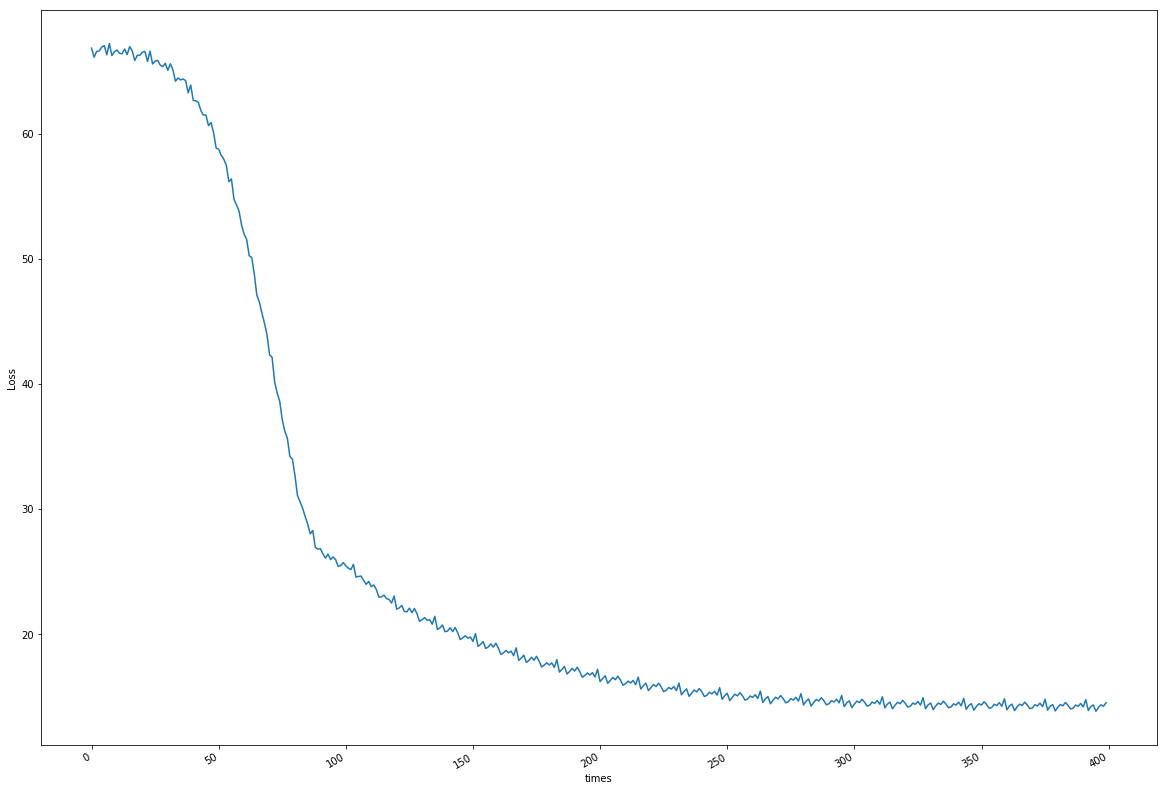

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,15))

loss_df = pd.DataFrame(loss_holder,columns=["time","loss"])
x_times = loss_df["time"].values
plt.ylabel("Loss")
plt.xlabel("times")
plt.plot(loss_df["loss"].values)
#plt.xticks([10,100,400,700,1000])
#x轴字体倾斜避免重叠
fig.autofmt_xdate()
plt.show()